CSV

In [2]:
import sys
import numpy as np
import csv
import os
from pathlib import Path
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

Csv processing

In [3]:
def get_function(x, y):
    print(x.shape)
    a = (y[1] - y[0]) / (x[1] - x[0])
    b = y[0] - a * x[0]
    y_r = np.linspace(-1000, 1000, 4000)
    x_r = (y_r - b) / a
    return x_r, y_r

def get_degree(x, y):
    a = (y[1] - y[0]) / (x[1] - x[0])
    b = y[0] - a * x[0]
    y_r = np.linspace(-1000, 1000, 4000)
    mid_dis = (0 - b) / a
    return np.arctan((y[1] - y[0]) / (x[1] - x[0])) * 180 / np.pi , mid_dis

In [4]:
datasetPath = './'
csvfiles = [str(csvfile) for csvfile in Path(datasetPath).glob('*.[cC][sS][vV]')]
print(csvfiles)
for csvfile in csvfiles:
    print(csvfile)
    with open(csvfile, newline='') as data:
        rows = csv.reader(data)
        lidar_data = []
        for row in rows:
            if row[0] == 'x':
                pass
            else:
                if np.abs(float(row[0])) < 1000 and np.abs(float(row[1])) < 1000:
                   #  if float(row[0]) < -700 and float(row[1]) > 500:
                    if float((float(row[0]))**2+(float(row[1]))**2)>490000:   
                        pass
                    else:
                        lidar_data.append([float(row[0]), float(row[1])])
        lidar_data = np.array(lidar_data)
        kmeans = KMeans(n_clusters=2, random_state=0).fit(lidar_data)
        
        cluster_0 = []
        cluster_1 = []
        for ind in range((kmeans.labels_).shape[0]):
            if kmeans.labels_[ind] == 0:
                cluster_0.append(lidar_data[ind])
            else:
                cluster_1.append(lidar_data[ind])
        cluster_0 = np.array(cluster_0)
        cluster_1 = np.array(cluster_1)
        print(cluster_0)
        model = LinearRegression()
        x_0 = np.expand_dims(cluster_0[:, 0], axis = 1)
        y_0 = np.expand_dims(cluster_0[:, 1], axis = 1)
        model.fit(y_0, x_0)
        predict_0 = model.predict(y_0)
        plt.plot(predict_0, y_0, c = 'blue')
        x_0, y_0 = get_function(predict_0, y_0)
        plt.plot(x_0, y_0, c = 'red')
        
        model = LinearRegression()
        x_1 = np.expand_dims(cluster_1[:, 0], axis = 1)
        y_1 = np.expand_dims(cluster_1[:, 1], axis = 1)
        model.fit(y_1, x_1)
        predict_1 = model.predict(y_1)
        x_1, y_1 = get_function(predict_1, y_1)
        plt.plot(x_1, y_1, c = 'blue')

        x_c = (x_0 + x_1) / 2
        y_c = (y_0 + y_1) / 2
        plt.plot(x_c, y_c, c = 'green')
        print(90 - get_degree(x_c, y_c))

        plt.scatter(lidar_data[:, 0], lidar_data[:, 1], c = kmeans.labels_, s = 5, cmap = 'viridis')       
        # plt.savefig('./test'+str(csvfile[:-4])+'.png')
        plt.close('all')




[]


200.txt


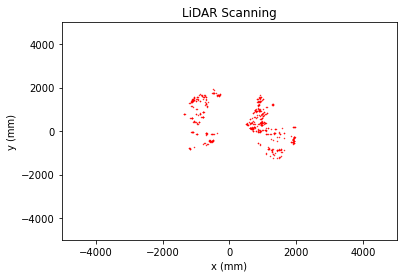

In [5]:
import sys
import numpy as np
import csv
import os
from pathlib import Path

try:
    save_dir = './' + sys.argv[1] + '/'
except:
    save_dir = './'

try:
    radius = float(sys.argv[2])
except: 
    radius = float("inf")

if not os.path.isdir(save_dir):
    os.mkdir(save_dir)

txtfiles = [str(csvfile) for csvfile in Path('./').glob('result*.[tT][xX][tT]')]

txtfiles = ['200.txt']
for txtfile in txtfiles:
    print(txtfile)
    f = open(txtfile, 'r')
    datas = f.read()
    f.close()
    datas = datas.split(', ')
    datas = [int(float(data)) for data in datas if data != '']
    xdata = []
    ydata = []
    coordinates = []
    lidar_data = []
    angle = np.arange(-45, 225.25, 0.25)
    for index, data in enumerate(datas):
        if data > radius:
            pass
        else:
            x = data * np.cos(angle[index] * np.pi / 180.)
            y = data * np.sin(angle[index] * np.pi / 180.)
            coordinates.append([x, y])
            if np.abs(float(x)) < 2000 and np.abs(float(y)) < 2000:
                #  if float(row[0]) < -700 and float(row[1]) > 500:
                if float((float(x))**2+(float(y))**2)>4000000:
                    pass
                else:
                    lidar_data.append([float(x), float(y)])
                    xdata.append(x)
                    ydata.append(y)  


    lidar_data = np.array(lidar_data)


fig = plt.figure()   
ax = fig.add_subplot(1, 1, 1)
ax.scatter(xdata,ydata , color='red',s = 0.2)
ax.set_xlim(left=-5000, right=5000)
ax.set_ylim(bottom=-5000, top=5000)
ax.set_xlabel('x (mm)')
ax.set_ylabel('y (mm)')
ax.set_title('LiDAR Scanning')
# plt.show() 
# plt.savefig('./test_update.png')    
# print('figure'+name+'OKKKKKKKKK')
# time.sleep(2)



Text(0.5, 1.0, 'LiDAR Scanning')

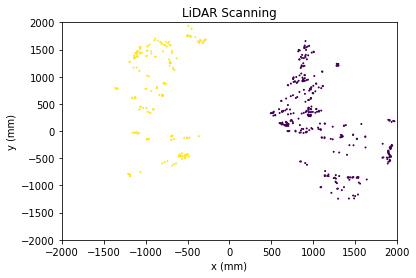

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from sklearn.cluster import DBSCAN
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score

clustering = DBSCAN(algorithm='auto', eps=500, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=30, n_jobs=1, p=None)
clustering = clustering.fit(lidar_data)

label = clustering.labels_
fig = plt.figure()   
ax = fig.add_subplot(1, 1, 1)
ax.scatter(lidar_data[:,0],lidar_data[:,1],c=clustering.labels_,s = 1)
ax.set_xlim(left=-2000, right=2000)
ax.set_ylim(bottom=-2000, top=2000)
ax.set_xlabel('x (mm)')
ax.set_ylabel('y (mm)')
ax.set_title('LiDAR Scanning')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(339, 1)
(198, 1)
Linear Regression 171.55946659442776 173.02394649181167


Text(0.5, 1.0, 'LiDAR Scanning')

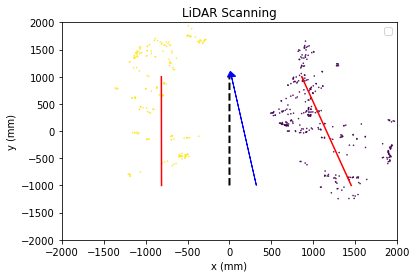

In [7]:
fig = plt.figure()   
ax = fig.add_subplot(1, 1, 1)
ax.scatter(lidar_data[:,0],lidar_data[:,1],c=clustering.labels_,s=0.3)
ax.set_xlim(left=-2000, right=2000)
ax.set_ylim(bottom=-2000, top=2000)


wall = []
x_data_array = []
y_data_array = []
obstacle_array = []
x_0list = []
y_0list = []
x_0list_pca = []
y_0list_pca = []
average_x_data = []
average_y_data = []

for j in range(max(clustering.labels_)+1):

    wall = []
    x_data_array = []
    y_data_array = []
    obstacle_array = []

    for i in range(len(lidar_data)):
        if clustering.labels_[i] == j:
            xdata,ydata,label = lidar_data[:,0][i],lidar_data[:,1][i],clustering.labels_[i]
            
            obstacle_array.append([xdata,ydata])
            x_data_array.append(xdata)
            y_data_array.append(ydata)
    #print(x_data_array)
    x_min = min(x_data_array)
    x_max = max(x_data_array)
    x_mean = np.mean(x_data_array)
    y_min = min(y_data_array)
    y_max = max(y_data_array)
    y_mean = np.mean(y_data_array)  
    
    x_dis = np.abs((x_max - x_min))
    y_dis = np.abs((y_max - y_min))

    # ax.add_patch(patches.Rectangle((x_min-200, y_min-300), x_dis+400, y_dis+600, edgecolor = 'red', fill=False ))


    model = LinearRegression()
    x_0 = np.expand_dims(x_data_array, axis = 1)
    y_0 = np.expand_dims(y_data_array, axis = 1)
    model.fit(y_0, x_0)
    predict_0 = model.predict(y_0)
    x_0, y_0 = get_function(predict_0, y_0)
    plt.plot(x_0, y_0, c = 'red')

    x_0list.append(x_0)
    y_0list.append(y_0)
    # average_x_data.append()
    # average_y_data.append()
    # pca = PCA(n_components=1)
    # x_0 = np.expand_dims(x_data_array, axis = 1)
    # y_0 = np.expand_dims(y_data_array, axis = 1)
    # pca.fit(lidar_data)  
    # newData=pca.fit_transform(obstacle_array)
    # print(newData)
    # x_0, y_0 = get_function(newData, y_0)
    # P1 = pca.components_
    # plt.plot(x_0, y_0, c = 'Blue')
    #print(P1) 

    # for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
    #     comp = comp * var  # scale component by its variance explanation power
    #     print(comp)
    #     x_0, y_0 = get_function(np.array([0,comp[0]]), np.array([0,comp[1]]))
    #     plt.plot(
    #         x_0,
    #         y_0,
    #         label=f"Component {i}",
    #         linewidth=1,
    #         color=f"C{i + 5}",
    #     )

    # x_norm, means, stds = featureNormalizse(np.array(obstacle_array))
    # U, S, V = pca(x_norm)

    # plt.scatter(data[:,0], data[:,1], label='sample data')  # 样本数据点

    # plt.plot([means[0] - 500*S[0]*U[0,0], means[0] + 500*S[0]*U[0,0]], 
    #         [means[1] - 500*S[0]*U[0,1], means[1] + 500*S[0]*U[0,1]],
    #         c='b', linewidth=1, label='First Principal Component')  # 第一个成分
    # plt.plot([means[0], means[0] - 500*S[0]*U[0,0]], 
    #         [means[1], means[1] - 500*S[0]*U[0,1]],
    #         c='b', linewidth=1)  # 第一个成分

    # x = means[0]    
    # y = means[1]

    # x2 = means[0] + 500*S[0]*U[0,0]
    # y2 = means[1] + 500*S[0]*U[0,1]

    # a = (y2-y)/(x2-x)
    # b = y-a*x

    y_r = np.linspace(-1000, 1000, 4000)
    # x_r = (y_r - b) / a

    # x_0list_pca.append(x_r)
    # y_0list_pca.append(y_r)


    # ax.plot(x_r,y_r,c='b', linewidth=1)  # 第一个成分)

    # if y_dis < 400:
    #     obstacle_name = 'Wall'
    # else:
    #     obstacle_name = 'Obstacle'

    # ax.text(x_min-200, y_max+400, obstacle_name, fontsize=10, color='blue')

    # ls_model_y1, ransac_model_y1 = fit_curve(x_data_array,y_data_array)
    # ls_model_y2, ransac_model_y2 = fit_curve(df2)


    # ax.plot(x_data_array, ls_model_y1, color = 'red', label='Least sqaure model')
    # ax.plot(x_data_array, ransac_model_y1, color = 'blue', label='Ransac model')
    # ax.legend()

# Y = np.linspace(-1000,1,1000)
X = np.zeros(y_r.size)

# linear
x_c = (x_0list[0] + x_0list[1]) / 2
y_c = (y_0list[0] + y_0list[1]) / 2
plt.arrow(x_c[0], y_c[0],x_c[-1]-x_c[0],y_c[-1]-y_c[0],head_length=100,head_width=100,color="blue")
# plt.arrow(0, -1000, 0, 2000,head_length=100,head_width=100,color="k")
ax.plot( X, y_r, color = 'k', linewidth=2, linestyle='--')
print('Linear Regression',90 - get_degree(x_c, y_c)[0],get_degree(x_c, y_c)[1])


# #PCA
# x_c = (x_0list_pca[0] + x_0list_pca[1]) / 2
# y_c = (y_0list_pca[0] + y_0list_pca[1]) / 2
# plt.plot(x_c, y_c, c = 'blue',label = 'PCA')
# print('PCA',90 - get_degree(x_c, y_c)[0],get_degree(x_c, y_c)[1])
#print(x_0list_pca)


ax.legend()
ax.set_xlabel('x (mm)')
ax.set_ylabel('y (mm)')
ax.set_title('LiDAR Scanning')

200.txt


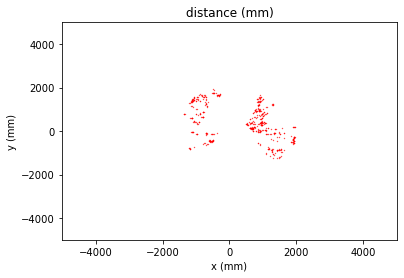

In [8]:
import sys
import numpy as np
import csv
import os
from pathlib import Path

try:
    save_dir = './' + sys.argv[1] + '/'
except:
    save_dir = './'

try:
    radius = float(sys.argv[2])
except: 
    radius = float("inf")

if not os.path.isdir(save_dir):
    os.mkdir(save_dir)

txtfiles = [str(csvfile) for csvfile in Path('./').glob('result*.[tT][xX][tT]')]

txtfiles = ['200.txt']
for txtfile in txtfiles:
    print(txtfile)
    f = open(txtfile, 'r')
    datas = f.read()
    f.close()
    datas = datas.split(', ')
    datas = [int(float(data)) for data in datas if data != '']
    xdata = []
    ydata = []
    coordinates = []
    lidar_data_liner = []
    angle = np.arange(-45, 225.25, 0.25)
    for index, data in enumerate(datas):
        if data > radius:
            pass
        else:
            x = data * np.cos(angle[index] * np.pi / 180.)
            y = data * np.sin(angle[index] * np.pi / 180.)
            coordinates.append([x, y])
            if np.abs(float(x)) < 5000 and np.abs(float(y)) < 5000:
                #  if float(row[0]) < -700 and float(row[1]) > 500:
                if float((float(x))**2+(float(y))**2)>4000000:   
                    pass
                else:
                    lidar_data_liner.append([float(x), float(y)])
                    xdata.append(x)
                    ydata.append(y)


    lidar_data_liner = np.array(lidar_data_liner)


fig = plt.figure()   
ax = fig.add_subplot(1, 1, 1)
ax.scatter(xdata,ydata , color='red',s = 0.1)
ax.set_xlim(left=-5000, right=5000)
ax.set_ylim(bottom=-5000, top=5000)
ax.set_xlabel('x (mm)')
ax.set_ylabel('y (mm)')
ax.set_title('distance (mm)')
# plt.show() 
# plt.savefig('./test_update.png')    
# print('figure'+name+'OKKKKKKKKK')
# time.sleep(2)

In [9]:
def fit_curve(xdata,ydata):

    x_values = np.array(xdata)
    y_values = np.array(ydata)

    """
    Based on the data the equation that is required is: ax^2 + bx + c = y
    So, we need to define matrices:
     1. A with columns [x^2  x  1]
     2. P = [a b c]*   (* = transpose)
     3. Y
    So that we will be finding the solution for the equation AP = Y
    """
    x_sq = np.power(x_values, 2)

    ## A = [x^2  x  1]
    A = np.stack((x_sq, x_values, np.ones((len(x_values)), dtype = int)), axis = 1)
    threshold = np.std(y_values)/2  # this can be tuned to sd/3 or sd/5 for various curves and better consistent results as a result of random sampling
    
    # Instantiating the linear least sqaure model
    linear_ls_model = LinearLeastSqaureModel()
    linear_ls_model_estimate = linear_ls_model.fit(A, y_values)
    linear_model_y = A.dot(linear_ls_model_estimate)

    # Instantiating the ransac model
    ransac_model = RansacModel(linear_ls_model)
    ransac_model_estimate = ransac_model.fit(A, y_values, 3, threshold)
    ransac_model_y = A.dot(ransac_model_estimate)

    return linear_model_y, ransac_model_y


In [10]:
import numpy as np
import math
import pandas as pd
from matplotlib import pyplot as plt
from ransac import RansacModel
from linearleastsquare import LinearLeastSqaureModel


fig = plt.figure()   
ax = fig.add_subplot(1, 1, 1)
ax.scatter(lidar_data[:,0],lidar_data[:,1],c=clustering.labels_)
ax.set_xlim(left=-5000, right=5000)
ax.set_ylim(bottom=-5000, top=5000)


wall = []
x_data_array = []
y_data_array = []
obstacle_array = []

for j in range(max(clustering.labels_)+1):

    wall = []
    x_data_array = []
    y_data_array = []
    obstacle_array = []

    for i in range(len(lidar_data)):
        if clustering.labels_[i] == j:
            xdata,ydata,label = lidar_data[:,0][i],lidar_data[:,1][i],clustering.labels_[i]
            
            obstacle_array.append([xdata,ydata])
            x_data_array.append(xdata)
            y_data_array.append(ydata)
    #print(x_data_array)
    x_min = min(x_data_array)
    x_max = max(x_data_array)
    y_min = min(y_data_array)
    y_max = max(y_data_array)
    
    x_dis = np.abs((x_max - x_min))
    y_dis = np.abs((y_max - y_min))

    # ax.add_patch(patches.Rectangle((x_min-200, y_min-300), x_dis+400, y_dis+600, edgecolor = 'red', fill=False ))


    model = LinearRegression()
    x_0 = np.expand_dims(x_data_array, axis = 1)
    y_0 = np.expand_dims(y_data_array, axis = 1)
    model.fit(y_0, x_0)
    predict_0 = model.predict(y_0)
    x_0, y_0 = get_function(predict_0, y_0)
    plt.plot(x_0, y_0, c = 'red')


    # pca = PCA(n_components=1)
    # pca.fit(obstacle_array)  
    # newData=pca.fit_transform(obstacle_array)
    #print(newData)

    # P1 = pca.components_
    # print(P1) 

    # for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
    #     comp = comp * var  # scale component by its variance explanation power
    #     plt.plot(
    #         [0, comp[0]],
    #         [0, comp[1]],
    #         label=f"Component {i}",
    #         linewidth=1,
    #         color=f"C{i + 2}",
    #     )


    # if y_dis < 400:
    #     obstacle_name = 'Wall'
    # else:
    #     obstacle_name = 'Obstacle'

    # ax.text(x_min-200, y_max+400, obstacle_name, fontsize=10, color='blue')

    ls_model_y1, ransac_model_y1 = fit_curve(x_data_array,y_data_array)
    # ls_model_y2, ransac_model_y2 = fit_curve(df2)
    print(ransac_model_y1)

    # ax.plot(x_data_array, ls_model_y1, color = 'red', label='Least sqaure model')
    ax.plot(x_data_array, ransac_model_y1, color = 'blue', label='Ransac model')
    ax.legend()



ax.set_xlabel('x (mm)')
ax.set_ylabel('y (mm)')
ax.set_title('distance (mm)')


        

ModuleNotFoundError: No module named 'ransac'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

size = 100

data_x = np.random.uniform(-10.0, 10.0, size=(size, 1))
data_y = data_x - np.random.uniform(-2.0, 2.0, size=(size, 1))
data = np.array((obstacle_array))
atrix = np.cov(data,rowvar=0)
eig_val, eig_vec = np.linalg.eig(cov_matrix)

plt.plot([eig_vec[0, 0] * 12,0], [eig_vec[0, 1] * 12,0],color='red')
plt.plot([eig_vec[1, 0] * 2,0], [eig_vec[1, 1] * 2,0],color='orange')

plt.plot(data[:,0],data[:,1], 'o', color='blue')

# plt.xlim(-12, 12)
# plt.ylim(-12, 12)
plt.show()

NameError: name 'cov_matrix' is not defined

In [ ]:
from scipy.io import loadmat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

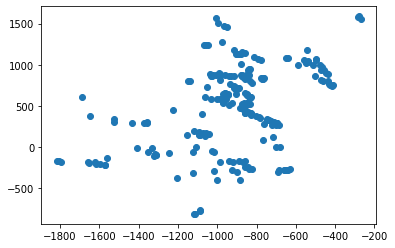

In [ ]:
plt.scatter(data[:,0], data[:,1])
plt.show()

In [ ]:
def featureNormalizse(x):
    mean = x.mean(axis=0)
    std = x.std(axis=0)
    return (x-mean)/std, mean, std

In [ ]:
x_norm, means, stds = featureNormalizse(data)
x_norm[:5]

array([[2.26546812, 2.15661056],
       [2.22290231, 2.21551197],
       [2.20677832, 2.18735153],
       [1.29560786, 1.40223028],
       [1.45772062, 1.17549604]])

In [ ]:
print(x_norm.shape)
sigma = (x_norm.T.dot(x_norm))/x_norm.shape[0]
sigma

(215, 2)


array([[1.        , 0.48394599],
       [0.48394599, 1.        ]])

In [ ]:
U,S,V = np.linalg.svd(sigma)
U,S,V

NameError: name 'sigma' is not defined

In [ ]:
def pca(x):
    sigma = (x.T.dot(x))/x.shape[0]
    U,S,V = np.linalg.svd(sigma)
    return U,S,V

wall.txt
[[ 1283.39880785 -1283.39880785]
 [ 1281.17441762 -1270.04256292]
 [ 1286.70381027 -1264.4403128 ]
 [ 1305.81844286 -1272.07200829]
 [ 1299.84701921 -1255.24767542]
 [ 1169.50725457 -1119.55963731]
 [ 1015.52411942  -963.69640597]
 [ 1059.05139021  -996.25606793]
 [  918.74824474  -805.72058605]
 [  895.84027172  -778.74206741]
 [  969.68318001  -835.53248315]
 [ 1428.0424034  -1219.66343476]
 [ 1470.74896927 -1245.08090877]
 [ 1476.16764189 -1238.65172387]
 [ 1456.95527178 -1211.73690875]
 [ 1182.90048633  -975.10791169]
 [ 1039.23492836  -849.09055093]
 [ 1026.60981508  -831.33223658]
 [ 1018.52913492  -817.45605467]
 [  935.21674744  -743.90499078]
 [  910.96763982  -718.1489812 ]
 [  907.78838815  -709.24201958]
 [  986.78058803  -764.04716548]
 [ 1242.13337199  -605.82892486]
 [ 1029.49808755  -496.57092921]
 [ 1038.87566229  -495.51827243]
 [ 1077.20607824  -508.04336922]
 [ 1067.25318465  -469.60264038]
 [ 1038.1120042   -451.38394602]
 [ 1031.802529    -443.29735072]
 

NameError: name 'X' is not defined

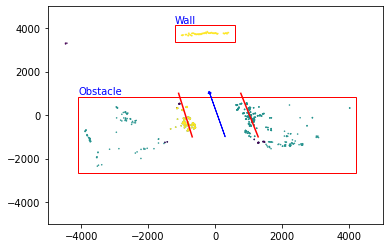

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Circle, Wedge, Polygon 
from sklearn.cluster import DBSCAN
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score

txtfiles = ['wall.txt']
for txtfile in txtfiles:
    print(txtfile)
    f = open(txtfile, 'r')
    datas = f.read()
    f.close()
    datas = datas.split(', ')
    datas = [int(float(data)) for data in datas if data != '']
    xdata = []
    ydata = []
    coordinates = []
    lidar_data = []
    angle = np.arange(-45, 225.25, 0.25)
    for index, data in enumerate(datas):
        if data > radius:
            pass
        else:
            x = data * np.cos(angle[index] * np.pi / 180.)
            y = data * np.sin(angle[index] * np.pi / 180.)
            coordinates.append([x, y])
            if np.abs(float(x)) < 7000 and np.abs(float(y)) < 7000:
                #  if float(row[0]) < -700 and float(row[1]) > 500:
                if float((float(x))**2+(float(y))**2)>4000000:
                    pass
                else:
                    lidar_data.append([float(x), float(y)])
                    xdata.append(x)
                    ydata.append(y)  

    # print(lidar_data)
    lidar_data = np.array(lidar_data)
    all_data = np.array(coordinates)


clustering = DBSCAN(algorithm='auto', eps=500, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=50, n_jobs=1, p=None)
clustering = clustering.fit(lidar_data)

clustering2 = DBSCAN(algorithm='auto', eps=1500, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=50, n_jobs=1, p=None)
clustering2 = clustering2.fit(all_data)


fig = plt.figure()   
ax = fig.add_subplot(1, 1, 1)
ax.scatter(all_data[:,0],all_data[:,1],c=clustering2.labels_,s=0.3)
ax.scatter(lidar_data[:,0],lidar_data[:,1],c=clustering.labels_,s=0.4)


ax.set_xlim(left=-5000, right=5000)
ax.set_ylim(bottom=-5000, top=5000)

wall = []
x_data_array = []
y_data_array = []
obstacle_array = []
x_0list = []
y_0list = []
x_0list_pca = []
y_0list_pca = []
average_x_data = []
print(lidar_data)

for j in range(max(clustering.labels_)+1):

    wall = []
    x_data_array = []
    y_data_array = []
    obstacle_array = []

    all_x_data_array = []
    all_y_data_array = []
    all_obstacle_array = []
    for i in range(len(lidar_data)):
        if clustering.labels_[i] == j:
            xdata,ydata,label = lidar_data[:,0][i],lidar_data[:,1][i],clustering.labels_[i]
            
            obstacle_array.append([xdata,ydata])
            x_data_array.append(xdata)
            y_data_array.append(ydata)

    for i in range(len(all_data)):
        if clustering2.labels_[i] == j:
            xdata_all,ydata_all,label_all = all_data[:,0][i],all_data[:,1][i],clustering2.labels_[i]
            
            all_obstacle_array.append([xdata_all,ydata_all])
            all_x_data_array.append(xdata_all)
            all_y_data_array.append(ydata_all)


    average_x = np.mean(x_data_array)
    #print(x_data_array)
    x_min = min(all_x_data_array)
    x_max = max(all_x_data_array)
    x_mean = np.mean(all_x_data_array)
    y_min = min(all_y_data_array)
    y_max = max(all_y_data_array)
    y_mean = np.mean(all_y_data_array)  
    
    x_dis = np.abs((x_max - x_min))
    y_dis = np.abs((y_max - y_min))

    ax.add_patch(patches.Rectangle((x_min-200, y_min-300), x_dis+400, y_dis+600, edgecolor = 'red', fill=False ))


    model = LinearRegression()
    x_0 = np.expand_dims(x_data_array, axis = 1)
    y_0 = np.expand_dims(y_data_array, axis = 1)
    model.fit(y_0, x_0)
    predict_0 = model.predict(y_0)
    x_0, y_0 = get_function(predict_0, y_0)
    plt.plot(x_0, y_0, c = 'red')

    x_0list.append(x_0)
    y_0list.append(y_0)
    average_x_data.append(average_x)

    # pca = PCA(n_components=1)
    # x_0 = np.expand_dims(x_data_array, axis = 1)
    # y_0 = np.expand_dims(y_data_array, axis = 1)
    # pca.fit(lidar_data)  
    # newData=pca.fit_transform(obstacle_array)
    # print(newData)
    # x_0, y_0 = get_function(newData, y_0)
    # P1 = pca.components_
    # plt.plot(x_0, y_0, c = 'Blue')
    #print(P1) 

    # for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
    #     comp = comp * var  # scale component by its variance explanation power
    #     print(comp)
    #     x_0, y_0 = get_function(np.array([0,comp[0]]), np.array([0,comp[1]]))
    #     plt.plot(
    #         x_0,
    #         y_0,
    #         label=f"Component {i}",
    #         linewidth=1,
    #         color=f"C{i + 5}",
    #     )

    # x_norm, means, stds = featureNormalizse(np.array(obstacle_array))
    # U, S, V = pca(x_norm)

    # plt.scatter(data[:,0], data[:,1], label='sample data')  # 样本数据点

    # plt.plot([means[0] - 500*S[0]*U[0,0], means[0] + 500*S[0]*U[0,0]], 
    #         [means[1] - 500*S[0]*U[0,1], means[1] + 500*S[0]*U[0,1]],
    #         c='b', linewidth=1, label='First Principal Component')  # 第一个成分
    # plt.plot([means[0], means[0] - 500*S[0]*U[0,0]], 
    #         [means[1], means[1] - 500*S[0]*U[0,1]],
    #         c='b', linewidth=1)  # 第一个成分

    # x = means[0]    
    # y = means[1]

    # x2 = means[0] + 500*S[0]*U[0,0]
    # y2 = means[1] + 500*S[0]*U[0,1]

    # a = (y2-y)/(x2-x)
    # b = y-a*x

    # y_r = np.linspace(-1000, 1000, 4000)
    # x_r = (y_r - b) / a

    # x_0list_pca.append(x_r)
    # y_0list_pca.append(y_r)


    # ax.plot(x_r,y_r,c='b', linewidth=1)  # 第一个成分)

    if y_dis < 400:
        obstacle_name = 'Wall'
        wall_mean_x = x_mean
        wall_mean_y = y_mean

    else:
        obstacle_name = 'Obstacle'

    ax.text(x_min-200, y_max+400, obstacle_name, fontsize=10, color='blue')

    # ls_model_y1, ransac_model_y1 = fit_curve(x_data_array,y_data_array)
    # ls_model_y2, ransac_model_y2 = fit_curve(df2)


    # ax.plot(x_data_array, ls_model_y1, color = 'red', label='Least sqaure model')
    # ax.plot(x_data_array, ransac_model_y1, color = 'blue', label='Ransac model')
    # ax.legend()

# linear
print(average_x_data)
x_c = (x_0list[0] + x_0list[1]) / 2
y_c = (y_0list[0] + y_0list[1]) / 2
plt.arrow(x_c[0], y_c[0],x_c[-1]-x_c[0],y_c[-1]-y_c[0],head_length=100,head_width=100,color="blue")
# plt.arrow(0, -1000, 0, 2000,head_length=100,head_width=100,color="k")
ax.plot( X, y_r, color = 'k', linewidth=1, linestyle='--')
print('Linear Regression',90 - get_degree(x_c, y_c)[0],get_degree(x_c, y_c)[1])


if wall_mean_x != None :
    robot_state_x = 0
    robot_state_y = 0

    turn_pos_x = 0
    turn_pos_y = wall_mean_y - 2500
    from scipy.interpolate import make_interp_spline

    xs = turn_pos_x - np.linspace(0,1000,500)
    ys = turn_pos_y + np.linspace(0,1000,500)

    point1 = np.array([turn_pos_x,turn_pos_y])
    point2 = np.array([turn_pos_x-1000,turn_pos_y+1000])
    circle_cen = np.array([turn_pos_x-1000,turn_pos_y])
    
    semicircle = Wedge(circle_cen,1000,0,90)

    #ax.add_patch(patches.Wedge(circle_cen,1000,0,90,width = 25,edgecolor='green'))
    #plt.plot([robot_state_x,turn_pos_x], [robot_state_y,turn_pos_y], c = 'green')
    #plt.plot(xs, ys, c = 'green')
#PCA
# x_c = (x_0list_pca[0] + x_0list_pca[1]) / 2
# y_c = (y_0list_pca[0] + y_0list_pca[1]) / 2
# plt.plot(x_c, y_c, c = 'blue',label = 'PCA')
# print('PCA',90 - get_degree(x_c, y_c)[0],get_degree(x_c, y_c)[1])
# #print(x_0list_pca)


ax.legend()
ax.set_xlabel('x (mm)')
ax.set_ylabel('y (mm)')
ax.set_title('distance (mm)')


        